In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

import sys
sys.path.insert(1, "/home/lluc/Desktop/MASTER/Thesis/Lluc's codes/RCPE_2/")

from moist_konrad import *

from scipy.stats import linregress

from typhon import plots
plots.styles.use('typhon')

In [2]:
lambda_manabe_1_o = np.loadtxt('lambda-strong-manabe-1.txt', delimiter=" ")
res_manabe_1_o = np.loadtxt('results-strong-manabe-1.txt', delimiter=" ")
temp_manabe_1 = np.loadtxt('temp_file-strong-manabe-1.txt', delimiter=" ")
water_manabe_1 = np.loadtxt('water-strong-manabe-1.txt', delimiter=" ")

In [3]:
lambda_manabe_2_o = np.loadtxt('lambda-strong-manabe-2.txt', delimiter=" ")
res_manabe_2_o = np.loadtxt('results-strong-manabe-2.txt', delimiter=" ")
temp_manabe_2 = np.loadtxt('temp_file-strong-manabe-2.txt', delimiter=" ")
water_manabe_2 = np.loadtxt('water-strong-manabe-2.txt', delimiter=" ")

In [4]:
lambda_manabe_3_o = np.loadtxt('lambda-strong-manabe-3.txt', delimiter=" ")
res_manabe_3_o = np.loadtxt('results-strong-manabe-3.txt', delimiter=" ")
temp_manabe_3 = np.loadtxt('temp_file-strong-manabe-3.txt', delimiter=" ")
water_manabe_3 = np.loadtxt('water-strong-manabe-3.txt', delimiter=" ")

In [5]:
lambda_uniRH_1_o = np.loadtxt('lambda-strong-uniRH-1.txt', delimiter=" ")
res_uniRH_1_o = np.loadtxt('results-strong-uniRH-1.txt', delimiter=" ")
temp_uniRH_1 = np.loadtxt('temp_file-strong-uniRH-1.txt', delimiter=" ")
water_uniRH_1 = np.loadtxt('water-strong-uniRH-1.txt', delimiter=" ")

In [6]:
lambda_uniRH_2_o = np.loadtxt('lambda-strong-uniRH-2.txt', delimiter=" ")
res_uniRH_2_o = np.loadtxt('results-strong-uniRH-2.txt', delimiter=" ")
temp_uniRH_2 = np.loadtxt('temp_file-strong-uniRH-2.txt', delimiter=" ")
water_uniRH_2 = np.loadtxt('water-strong-uniRH-2.txt', delimiter=" ")

In [7]:
lambda_uniRH_3_o = np.loadtxt('lambda-strong-uniRH-4.txt', delimiter=" ")
res_uniRH_3_o = np.loadtxt('results-strong-uniRH-4.txt', delimiter=" ")
temp_uniRH_3 = np.loadtxt('temp_file-strong-uniRH-4.txt', delimiter=" ")
water_uniRH_3 = np.loadtxt('water-strong-uniRH-4.txt', delimiter=" ")

In [8]:
lambda_Cshape_1_o = np.loadtxt('lambda-strong-Cshape-1.txt', delimiter=" ")
res_Cshape_1_o = np.loadtxt('results-strong-Cshape-1.txt', delimiter=" ")
temp_Cshape_1 = np.loadtxt('temp_file-strong-Cshape-1.txt', delimiter=" ")
water_Cshape_1 = np.loadtxt('water-strong-Cshape-1.txt', delimiter=" ")

In [9]:
lambda_Cshape_2_o = np.loadtxt('lambda-strong-Cshape-2.txt', delimiter=" ")
res_Cshape_2_o = np.loadtxt('results-strong-Cshape-2.txt', delimiter=" ")
temp_Cshape_2 = np.loadtxt('temp_file-strong-Cshape-2.txt', delimiter=" ")
water_Cshape_2 = np.loadtxt('water-strong-Cshape-2.txt', delimiter=" ")

In [10]:
lambda_Cshape_3_o = np.loadtxt('lambda-strong-Cshape-3.txt', delimiter=" ")
res_Cshape_3_o = np.loadtxt('results-strong-Cshape-3.txt', delimiter=" ")
temp_Cshape_3 = np.loadtxt('temp_file-strong-Cshape-3.txt', delimiter=" ")
water_Cshape_3 = np.loadtxt('water-strong-Cshape-3.txt', delimiter=" ")

In [11]:
"""
(str(depth_d)+"1"+str(case)+"2"+str(Ts_f[0])
                                   +"3"+str(surface['temperature'][0])+"4"+str(T_ini)
                                   +"5"+str(net_rad_surface)+"6"+str(atm_rad)+"7"+str(radiation['toa'][0])
                                   +"8"+str(olr_rec)+"9"+str(net_sw)+"10"+str(isr_rec)
                                   +"11"+str(E_imbalance[0])
                                   +"12"+str(LH)+"13"+str(SH[0])+"14"+str(prec_eff[0])
                                   +"15"+str(prec_mass[0])+"16"+str(LH/Lv * seconds_day)
                                   +"17"+str(RH[0])+"18"+str(water_content[0])+"20"+str(ini_rh)
                                   +"21"+str(atmosphere['CO2'][0][0])
"""

'\n(str(depth_d)+"1"+str(case)+"2"+str(Ts_f[0])\n                                   +"3"+str(surface[\'temperature\'][0])+"4"+str(T_ini)\n                                   +"5"+str(net_rad_surface)+"6"+str(atm_rad)+"7"+str(radiation[\'toa\'][0])\n                                   +"8"+str(olr_rec)+"9"+str(net_sw)+"10"+str(isr_rec)\n                                   +"11"+str(E_imbalance[0])\n                                   +"12"+str(LH)+"13"+str(SH[0])+"14"+str(prec_eff[0])\n                                   +"15"+str(prec_mass[0])+"16"+str(LH/Lv * seconds_day)\n                                   +"17"+str(RH[0])+"18"+str(water_content[0])+"20"+str(ini_rh)\n                                   +"21"+str(atmosphere[\'CO2\'][0][0])\n'

In [12]:
res_manabe_1 = res_manabe_1_o[:,:]


res_mb_1_348 = res_manabe_1[np.where(res_manabe_1[:,-1]==0.000348)[-1],:]
print(res_mb_1_348.shape)

res_mb_1_796 = res_manabe_1[np.where(res_manabe_1[:,-1]==0.000348*2)[-1],:]
print(res_mb_1_796.shape)

Ts_mb_1_348 = res_mb_1_348[:,3]
Ts_mb_1_796 = res_mb_1_796[:,3]

Rs_mb_1_348 = res_mb_1_348[:,5]
Rs_mb_1_796 = res_mb_1_796[:,5]

OLR_mb_1_348 = res_mb_1_348[:,8]
OLR_mb_1_796 = res_mb_1_796[:,8]

Efrac_mb_1_348 = res_mb_1_348[:,14]
Efrac_mb_1_796 = res_mb_1_796[:,14]

Prec_mb_1_348 = res_mb_1_348[:,15]
Prec_mb_1_796 = res_mb_1_796[:,15]

RH_mb_1_348 = res_mb_1_348[:,17]
RH_mb_1_796 = res_mb_1_796[:,17]

wvc_mb_1_348 = res_mb_1_348[:,18]
wvc_mb_1_796 = res_mb_1_796[:,18]

(60, 21)
(60, 21)


In [13]:
res_manabe_2 = res_manabe_2_o[:,:]


res_mb_2_348 = res_manabe_2[np.where(res_manabe_2[:,-1]==0.000348)[-1],:]
print(res_mb_2_348.shape)

res_mb_2_796 = res_manabe_2[np.where(res_manabe_2[:,-1]==0.000348*2)[-1],:]
print(res_mb_2_796.shape)

Ts_mb_2_348 = res_mb_2_348[:,3]
Ts_mb_2_796 = res_mb_2_796[:,3]

Rs_mb_2_348 = res_mb_2_348[:,5]
Rs_mb_2_796 = res_mb_2_796[:,5]

OLR_mb_2_348 = res_mb_2_348[:,8]
OLR_mb_2_796 = res_mb_2_796[:,8]

Efrac_mb_2_348 = res_mb_2_348[:,14]
Efrac_mb_2_796 = res_mb_2_796[:,14]

Prec_mb_2_348 = res_mb_2_348[:,15]
Prec_mb_2_796 = res_mb_2_796[:,15]

RH_mb_2_348 = res_mb_2_348[:,17]
RH_mb_2_796 = res_mb_2_796[:,17]

wvc_mb_2_348 = res_mb_2_348[:,18]
wvc_mb_2_796 = res_mb_2_796[:,18]

(60, 21)
(60, 21)


In [14]:
res_manabe_3 = res_manabe_3_o[:,:]


res_mb_3_348 = res_manabe_3[np.where(res_manabe_3[:,-1]==0.000348)[-1],:]
print(res_mb_3_348.shape)

res_mb_3_796 = res_manabe_3[np.where(res_manabe_3[:,-1]==0.000348*2)[-1],:]
print(res_mb_3_796.shape)

Ts_mb_3_348 = res_mb_3_348[:,3]
Ts_mb_3_796 = res_mb_3_796[:,3]

Rs_mb_3_348 = res_mb_3_348[:,5]
Rs_mb_3_796 = res_mb_3_796[:,5]

OLR_mb_3_348 = res_mb_3_348[:,8]
OLR_mb_3_796 = res_mb_3_796[:,8]

Efrac_mb_3_348 = res_mb_3_348[:,14]
Efrac_mb_3_796 = res_mb_3_796[:,14]

Prec_mb_3_348 = res_mb_3_348[:,15]
Prec_mb_3_796 = res_mb_3_796[:,15]

RH_mb_3_348 = res_mb_3_348[:,17]
RH_mb_3_796 = res_mb_3_796[:,17]

wvc_mb_3_348 = res_mb_3_348[:,18]
wvc_mb_3_796 = res_mb_3_796[:,18]

(60, 21)
(60, 21)


In [15]:
res_uniRH_1 = res_uniRH_1_o[:,:]

res_rh_1_348 = res_uniRH_1[np.where(res_uniRH_1[:,-1]==0.000348)[-1],:]
print(res_rh_1_348.shape)

res_rh_1_796 = res_uniRH_1[np.where(res_uniRH_1[:,-1]==0.000348*2)[-1],:]
print(res_rh_1_796.shape)

Ts_rh_1_348 = res_rh_1_348[:,3]
Ts_rh_1_796 = res_rh_1_796[:,3]

Rs_rh_1_348 = res_rh_1_348[:,5]
Rs_rh_1_796 = res_rh_1_796[:,5]

OLR_rh_1_348 = res_rh_1_348[:,8]
OLR_rh_1_796 = res_rh_1_796[:,8]

Efrac_rh_1_348 = res_rh_1_348[:,14]
Efrac_rh_1_796 = res_rh_1_796[:,14]

Prec_rh_1_348 = res_rh_1_348[:,15]
Prec_rh_1_796 = res_rh_1_796[:,15]

RH_rh_1_348 = res_rh_1_348[:,17]
RH_rh_1_796 = res_rh_1_796[:,17]

wvc_rh_1_348 = res_rh_1_348[:,18]
wvc_rh_1_796 = res_rh_1_796[:,18]

(60, 21)
(60, 21)


In [16]:
res_uniRH_2 = res_uniRH_2_o[:,:]

res_rh_2_348 = res_uniRH_2[np.where(res_uniRH_2[:,-1]==0.000348)[-1],:]
print(res_rh_2_348.shape)

res_rh_2_796 = res_uniRH_2[np.where(res_uniRH_2[:,-1]==0.000348*2)[-1],:]
print(res_rh_2_796.shape)

Ts_rh_2_348 = res_rh_2_348[:,3]
Ts_rh_2_796 = res_rh_2_796[:,3]

Rs_rh_2_348 = res_rh_2_348[:,5]
Rs_rh_2_796 = res_rh_2_796[:,5]

OLR_rh_2_348 = res_rh_2_348[:,8]
OLR_rh_2_796 = res_rh_2_796[:,8]

Efrac_rh_2_348 = res_rh_2_348[:,14]
Efrac_rh_2_796 = res_rh_2_796[:,14]

Prec_rh_2_348 = res_rh_2_348[:,15]
Prec_rh_2_796 = res_rh_2_796[:,15]

RH_rh_2_348 = res_rh_2_348[:,17]
RH_rh_2_796 = res_rh_2_796[:,17]

wvc_rh_2_348 = res_rh_2_348[:,18]
wvc_rh_2_796 = res_rh_2_796[:,18]

(60, 21)
(60, 21)


In [17]:
res_uniRH_3 = res_uniRH_3_o[:-6,:]

res_rh_3_348 = res_uniRH_3[np.where(res_uniRH_3[:,-1]==0.000348)[-1],:]
print(res_rh_3_348.shape)

res_rh_3_796 = res_uniRH_3[np.where(res_uniRH_3[:,-1]==0.000348*2)[-1],:]
print(res_rh_3_796.shape)

Ts_rh_3_348 = res_rh_3_348[:,3]
Ts_rh_3_796 = res_rh_3_796[:,3]

Rs_rh_3_348 = res_rh_3_348[:,5]
Rs_rh_3_796 = res_rh_3_796[:,5]

OLR_rh_3_348 = res_rh_3_348[:,8]
OLR_rh_3_796 = res_rh_3_796[:,8]

Efrac_rh_3_348 = res_rh_3_348[:,14]
Efrac_rh_3_796 = res_rh_3_796[:,14]

Prec_rh_3_348 = res_rh_3_348[:,15]
Prec_rh_3_796 = res_rh_3_796[:,15]

RH_rh_3_348 = res_rh_3_348[:,17]
RH_rh_3_796 = res_rh_3_796[:,17]

wvc_rh_3_348 = res_rh_3_348[:,18]
wvc_rh_3_796 = res_rh_3_796[:,18]

(57, 21)
(57, 21)


In [18]:
res_Cshape_1 = res_Cshape_1_o[:,:]

res_cs_1_348 = res_Cshape_1[np.where(res_Cshape_1[:,-1]==0.000348)[-1],:]
print(res_cs_1_348.shape)

res_cs_1_796 = res_Cshape_1[np.where(res_Cshape_1[:,-1]==0.000348*2)[-1],:]
print(res_cs_1_796.shape)

Ts_cs_1_348 = res_cs_1_348[:,3]
Ts_cs_1_796 = res_cs_1_796[:,3]

Rs_cs_1_348 = res_cs_1_348[:,5]
Rs_cs_1_796 = res_cs_1_796[:,5]

OLR_cs_1_348 = res_cs_1_348[:,8]
OLR_cs_1_796 = res_cs_1_796[:,8]

Efrac_cs_1_348 = res_cs_1_348[:,14]
Efrac_cs_1_796 = res_cs_1_796[:,14]

Prec_cs_1_348 = res_cs_1_348[:,15]
Prec_cs_1_796 = res_cs_1_796[:,15]

RH_cs_1_348 = res_cs_1_348[:,17]
RH_cs_1_796 = res_cs_1_796[:,17]

wvc_cs_1_348 = res_cs_1_348[:,18]
wvc_cs_1_796 = res_cs_1_796[:,18]

(60, 21)
(60, 21)


In [19]:
res_Cshape_2 = res_Cshape_2_o[:,:]

res_cs_2_348 = res_Cshape_2[np.where(res_Cshape_2[:,-1]==0.000348)[-1],:]
print(res_cs_2_348.shape)

res_cs_2_796 = res_Cshape_2[np.where(res_Cshape_2[:,-1]==0.000348*2)[-1],:]
print(res_cs_2_796.shape)

Ts_cs_2_348 = res_cs_2_348[:,3]
Ts_cs_2_796 = res_cs_2_796[:,3]

Rs_cs_2_348 = res_cs_2_348[:,5]
Rs_cs_2_796 = res_cs_2_796[:,5]

OLR_cs_2_348 = res_cs_2_348[:,8]
OLR_cs_2_796 = res_cs_2_796[:,8]

Efrac_cs_2_348 = res_cs_2_348[:,14]
Efrac_cs_2_796 = res_cs_2_796[:,14]

Prec_cs_2_348 = res_cs_2_348[:,15]
Prec_cs_2_796 = res_cs_2_796[:,15]

RH_cs_2_348 = res_cs_2_348[:,17]
RH_cs_2_796 = res_cs_2_796[:,17]

wvc_cs_2_348 = res_cs_2_348[:,18]
wvc_cs_2_796 = res_cs_2_796[:,18]

(60, 21)
(60, 21)


In [20]:
res_Cshape_3 = res_Cshape_3_o[:,:]

res_cs_3_348 = res_Cshape_3[np.where(res_Cshape_3[:,-1]==0.000348)[-1],:]
print(res_cs_3_348.shape)

res_cs_3_796 = res_Cshape_3[np.where(res_Cshape_3[:,-1]==0.000348*2)[-1],:]
print(res_cs_3_796.shape)

Ts_cs_3_348 = res_cs_3_348[:,3]
Ts_cs_3_796 = res_cs_3_796[:,3]

Rs_cs_3_348 = res_cs_3_348[:,5]
Rs_cs_3_796 = res_cs_3_796[:,5]

OLR_cs_3_348 = res_cs_3_348[:,8]
OLR_cs_3_796 = res_cs_3_796[:,8]

Efrac_cs_3_348 = res_cs_3_348[:,14]
Efrac_cs_3_796 = res_cs_3_796[:,14]

Prec_cs_3_348 = res_cs_3_348[:,15]
Prec_cs_3_796 = res_cs_3_796[:,15]

RH_cs_3_348 = res_cs_3_348[:,17]
RH_cs_3_796 = res_cs_3_796[:,17]

wvc_cs_3_348 = res_cs_3_348[:,18]
wvc_cs_3_796 = res_cs_3_796[:,18]

(60, 21)
(60, 21)


In [21]:
"""
str(depth_d)+"1"+str(case)+"2"+str(Ts_f[0])
                                 +"3"+str(olr_rec)+"4"+str(net_sw)+"5"+str(isr_rec)
                                 +"6"+str(T_anom[-1][0])
                                 +"7"+str(lambda_1)+"8"+str(rval_1)
                                 +"9"+str(lambda_2)+"10"+str(rval_2)
                                 +"11"+str(((P2-P1)/P1*100/T_anom[-1])[0])
                                 +"12"+str((q2-q1)/q1*100/T_anom[-1][0])
                                 +"13"+str(np.max(toa2))+"14"+str(np.min(olr2))
"""

'\nstr(depth_d)+"1"+str(case)+"2"+str(Ts_f[0])\n                                 +"3"+str(olr_rec)+"4"+str(net_sw)+"5"+str(isr_rec)\n                                 +"6"+str(T_anom[-1][0])\n                                 +"7"+str(lambda_1)+"8"+str(rval_1)\n                                 +"9"+str(lambda_2)+"10"+str(rval_2)\n                                 +"11"+str(((P2-P1)/P1*100/T_anom[-1])[0])\n                                 +"12"+str((q2-q1)/q1*100/T_anom[-1][0])\n                                 +"13"+str(np.max(toa2))+"14"+str(np.min(olr2))\n'

In [22]:
lambda_manabe_1 = lambda_manabe_1_o[:,:]

isr_mb_1 = lambda_manabe_1[:,5]

ECS_mb_1 = lambda_manabe_1[:,6]

lam_toa_mb_1 = lambda_manabe_1[:,7]

lam_lw_mb_1 = lambda_manabe_1[:,9]

Fco2_mb_1 = -ECS_mb_1*lam_toa_mb_1
Mtoa_mb_1 = lambda_manabe_1[:,13]

dP_mb_1 = lambda_manabe_1[:,11]
dq_mb_1 = lambda_manabe_1[:,12]

In [23]:
lambda_manabe_2 = lambda_manabe_2_o[:,:]

isr_mb_2 = lambda_manabe_2[:,5]

ECS_mb_2 = lambda_manabe_2[:,6]

lam_toa_mb_2 = lambda_manabe_2[:,7]

lam_lw_mb_2 = lambda_manabe_2[:,9]

Fco2_mb_2 = -ECS_mb_2*lam_toa_mb_2
Mtoa_mb_2 = lambda_manabe_2[:,13]

dP_mb_2 = lambda_manabe_2[:,11]
dq_mb_2 = lambda_manabe_2[:,12]

In [24]:
lambda_manabe_3 = lambda_manabe_3_o[:,:]

isr_mb_3 = lambda_manabe_3[:,5]

ECS_mb_3 = lambda_manabe_3[:,6]

lam_toa_mb_3 = lambda_manabe_3[:,7]

lam_lw_mb_3 = lambda_manabe_3[:,9]

Fco2_mb_3 = -ECS_mb_3*lam_toa_mb_3
Mtoa_mb_3 = lambda_manabe_3[:,13]

dP_mb_3 = lambda_manabe_3[:,11]
dq_mb_3 = lambda_manabe_3[:,12]

In [25]:
lambda_uniRH_1 = lambda_uniRH_1_o[:,:]

isr_rh_1 = lambda_uniRH_1[:,5]

ECS_rh_1 = lambda_uniRH_1[:,6]

lam_toa_rh_1 = lambda_uniRH_1[:,7]

lam_lw_rh_1 = lambda_uniRH_1[:,9]

Fco2_rh_1 = -ECS_rh_1*lam_toa_rh_1
Mtoa_rh_1 = lambda_uniRH_1[:,13]

dP_rh_1 = lambda_uniRH_1[:,11]
dq_rh_1 = lambda_uniRH_1[:,12]

In [26]:
lambda_uniRH_2 = lambda_uniRH_2_o[:,:]

isr_rh_2 = lambda_uniRH_2[:,5]

ECS_rh_2 = lambda_uniRH_2[:,6]

lam_toa_rh_2 = lambda_uniRH_2[:,7]

lam_lw_rh_2 = lambda_uniRH_2[:,9]

Fco2_rh_2 = -ECS_rh_2*lam_toa_rh_2
Mtoa_rh_2 = lambda_uniRH_2[:,13]

dP_rh_2 = lambda_uniRH_2[:,11]
dq_rh_2 = lambda_uniRH_2[:,12]

In [27]:
lambda_uniRH_3 = lambda_uniRH_3_o[:-3,:]

isr_rh_3 = lambda_uniRH_3[:,5]

ECS_rh_3 = lambda_uniRH_3[:,6]

lam_toa_rh_3 = lambda_uniRH_3[:,7]

lam_lw_rh_3 = lambda_uniRH_3[:,9]

Fco2_rh_3 = -ECS_rh_3*lam_toa_rh_3
Mtoa_rh_3 = lambda_uniRH_3[:,13]

dP_rh_3 = lambda_uniRH_3[:,11]
dq_rh_3 = lambda_uniRH_3[:,12]

In [28]:
lambda_Cshape_1 = lambda_Cshape_1_o[:,:]

isr_cs_1 = lambda_Cshape_1[:,5]

ECS_cs_1 = lambda_Cshape_1[:,6]

lam_toa_cs_1 = lambda_Cshape_1[:,7]

lam_lw_cs_1 = lambda_Cshape_1[:,9]

Fco2_cs_1 = -ECS_cs_1*lam_toa_cs_1
Mtoa_cs_1 = lambda_Cshape_1[:,13]

dP_cs_1 = lambda_Cshape_1[:,11]
dq_cs_1 = lambda_Cshape_1[:,12]

In [29]:
lambda_Cshape_2 = lambda_Cshape_2_o[:,:]

isr_cs_2 = lambda_Cshape_2[:,5]

ECS_cs_2 = lambda_Cshape_2[:,6]

lam_toa_cs_2 = lambda_Cshape_2[:,7]

lam_lw_cs_2 = lambda_Cshape_2[:,9]

Fco2_cs_2 = -ECS_cs_2*lam_toa_cs_2
Mtoa_cs_2 = lambda_Cshape_2[:,13]

dP_cs_2 = lambda_Cshape_2[:,11]
dq_cs_2 = lambda_Cshape_2[:,12]

In [30]:
lambda_Cshape_3 = lambda_Cshape_3_o[:,:]

isr_cs_3 = lambda_Cshape_3[:,5]

ECS_cs_3 = lambda_Cshape_3[:,6]

lam_toa_cs_3 = lambda_Cshape_3[:,7]

lam_lw_cs_3 = lambda_Cshape_3[:,9]

Fco2_cs_3 = -ECS_cs_3*lam_toa_cs_3
Mtoa_cs_3 = lambda_Cshape_3[:,13]

dP_cs_3 = lambda_Cshape_3[:,11]
dq_cs_3 = lambda_Cshape_3[:,12]

281.81521435218156
281.79515271564355
281.8057227942267
0.1145716894963998


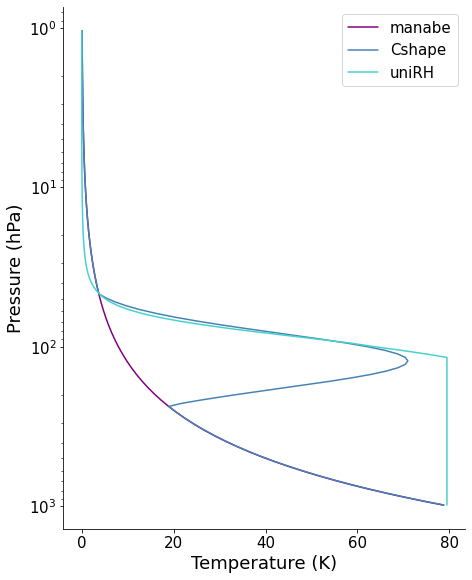

In [31]:
Tatm_mb_1 = temp_manabe_1[41,:]
Tatm_cs_1 = temp_Cshape_1[43,:]
Tatm_rh_1 = temp_uniRH_1[66,:]

qatm_mb_1 = water_manabe_1[41,:]
qatm_cs_1 = water_Cshape_1[43,:]
qatm_rh_1 = water_uniRH_1[66,:]

p,ph = konrad.utils.get_pressure_grids(1000e2, 100, 128)


print(Tatm_mb_1[0])
print(Tatm_cs_1[0])
print(Tatm_rh_1[0])

RH_mb_1 = konrad.physics.vmr2relative_humidity(qatm_mb_1,p,Tatm_mb_1)
RH_cs_1 = konrad.physics.vmr2relative_humidity(qatm_cs_1,p,Tatm_cs_1)
RH_rh_1 = konrad.physics.vmr2relative_humidity(qatm_rh_1,p,Tatm_rh_1)

print(RH_cs_1[-5]*100)

fig, ax = plt.subplots(figsize=(1.5*4.8, 1.5*6.4))


ax.plot(RH_mb_1*100, p/100,
               alpha = 1, color = 'purple', lw = 1.5, label = 'manabe')
ax.plot(RH_cs_1*100, p/100,
               alpha = 1, color = 'steelblue', lw = 1.5, label = 'Cshape')

ax.plot(RH_rh_1*100, p/100,
               alpha = 1, color = 'mediumturquoise', lw = 1.5, label = 'uniRH')


ax.set_yscale('log')
ax.yaxis.set_inverted(True)
ax.set_xlabel('Temperature (K)')
ax.set_ylabel('Pressure (hPa)')

plt.legend()
plt.show()

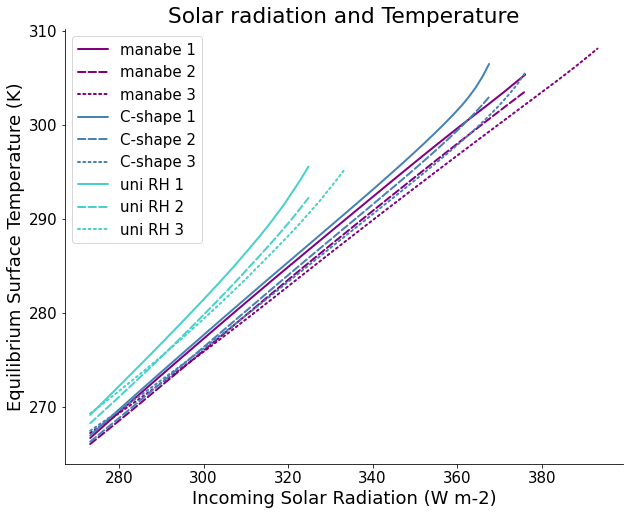

In [32]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.plot(isr_mb_1,Ts_mb_1_348,
        color = 'purple', label = 'manabe 1')

ax.plot(isr_mb_2,Ts_mb_2_348,
        color = 'purple', label = 'manabe 2', linestyle = 'dashed')

ax.plot(isr_mb_3,Ts_mb_3_348,
        color = 'purple', label = 'manabe 3', linestyle = 'dotted')

ax.plot(isr_cs_1,Ts_cs_1_348,
        color = 'steelblue', label = 'C-shape 1')

ax.plot(isr_cs_2,Ts_cs_2_348,
        color = 'steelblue', label = 'C-shape 2', linestyle = 'dashed')

ax.plot(isr_cs_3,Ts_cs_3_348,
        color = 'steelblue', label = 'C-shape 3', linestyle = 'dotted')

ax.plot(isr_rh_1,Ts_rh_1_348,
        color = 'mediumturquoise', label = 'uni RH 1')

ax.plot(isr_rh_2,Ts_rh_2_348,
        color = 'mediumturquoise', label = 'uni RH 2', linestyle = 'dashed')

ax.plot(isr_rh_3,Ts_rh_3_348,
        color = 'mediumturquoise', label = 'uni RH 3', linestyle = 'dotted')

ax.set_xlabel('Incoming Solar Radiation (W m-2)')
ax.set_ylabel('Equilibrium Surface Temperature (K)')
ax.set_title('Solar radiation and Temperature')
plt.legend()
plt.show()

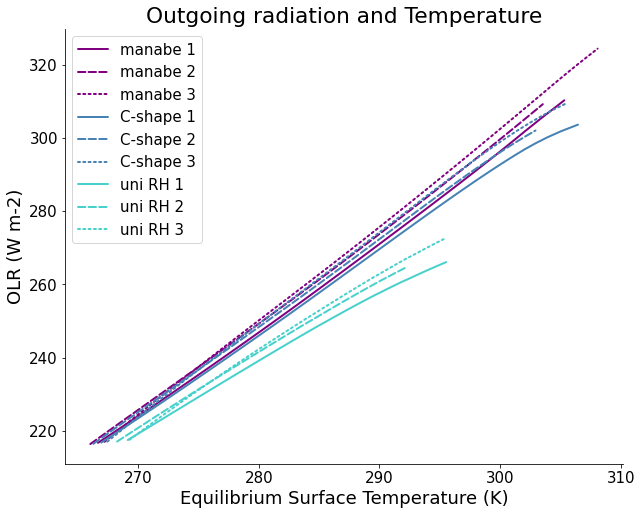

In [33]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.plot(Ts_mb_1_348,OLR_mb_1_348,
        color = 'purple', label = 'manabe 1')

ax.plot(Ts_mb_2_348,OLR_mb_2_348,
        color = 'purple', label = 'manabe 2', linestyle = 'dashed')

ax.plot(Ts_mb_3_348,OLR_mb_3_348,
        color = 'purple', label = 'manabe 3', linestyle = 'dotted')

ax.plot(Ts_cs_1_348,OLR_cs_1_348,
        color = 'steelblue', label = 'C-shape 1')

ax.plot(Ts_cs_2_348,OLR_cs_2_348,
        color = 'steelblue', label = 'C-shape 2', linestyle = 'dashed')

ax.plot(Ts_cs_3_348,OLR_cs_3_348,
        color = 'steelblue', label = 'C-shape 3', linestyle = 'dotted')

ax.plot(Ts_rh_1_348,OLR_rh_1_348,
        color = 'mediumturquoise', label = 'uni RH 1')

ax.plot(Ts_rh_2_348,OLR_rh_2_348,
        color = 'mediumturquoise', label = 'uni RH 2', linestyle = 'dashed')

ax.plot(Ts_rh_3_348,OLR_rh_3_348,
        color = 'mediumturquoise', label = 'uni RH 3', linestyle = 'dotted')


ax.set_ylabel('OLR (W m-2)')
ax.set_xlabel('Equilibrium Surface Temperature (K)')
ax.set_title('Outgoing radiation and Temperature')
plt.legend()
plt.show()

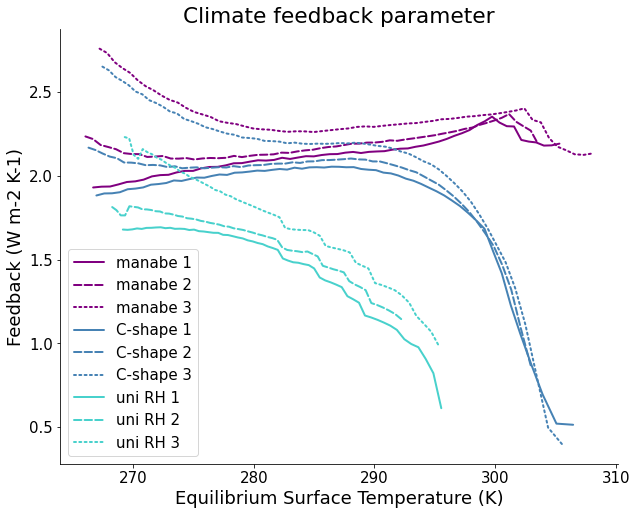

In [34]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.plot(Ts_mb_1_348,-lam_toa_mb_1,
        color = 'purple', label = 'manabe 1')

ax.plot(Ts_mb_2_348,-lam_toa_mb_2,
        color = 'purple', label = 'manabe 2', linestyle = 'dashed')

ax.plot(Ts_mb_3_348,-lam_toa_mb_3,
        color = 'purple', label = 'manabe 3', linestyle = 'dotted')

ax.plot(Ts_cs_1_348,-lam_toa_cs_1,
        color = 'steelblue', label = 'C-shape 1')

ax.plot(Ts_cs_2_348,-lam_toa_cs_2,
        color = 'steelblue', label = 'C-shape 2', linestyle = 'dashed')

ax.plot(Ts_cs_3_348,-lam_toa_cs_3,
        color = 'steelblue', label = 'C-shape 3', linestyle = 'dotted')

ax.plot(Ts_rh_1_348,-lam_toa_rh_1,
        color = 'mediumturquoise', label = 'uni RH 1')

ax.plot(Ts_rh_2_348,-lam_toa_rh_2,
        color = 'mediumturquoise', label = 'uni RH 2', linestyle = 'dashed')

ax.plot(Ts_rh_3_348,-lam_toa_rh_3,
        color = 'mediumturquoise', label = 'uni RH 3', linestyle = 'dotted')


ax.set_ylabel('Feedback (W m-2 K-1)')
ax.set_xlabel('Equilibrium Surface Temperature (K)')
ax.set_title('Climate feedback parameter')
plt.legend()
plt.show()

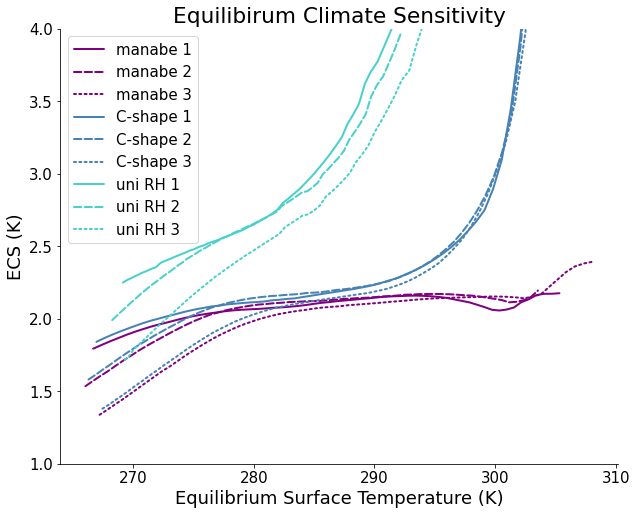

In [44]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.plot(Ts_mb_1_348,ECS_mb_1,
        color = 'purple', label = 'manabe 1')

ax.plot(Ts_mb_2_348,ECS_mb_2,
        color = 'purple', label = 'manabe 2', linestyle = 'dashed')

ax.plot(Ts_mb_3_348,ECS_mb_3,
        color = 'purple', label = 'manabe 3', linestyle = 'dotted')

ax.plot(Ts_cs_1_348,ECS_cs_1,
        color = 'steelblue', label = 'C-shape 1')

ax.plot(Ts_cs_2_348,ECS_cs_2,
        color = 'steelblue', label = 'C-shape 2', linestyle = 'dashed')

ax.plot(Ts_cs_3_348,ECS_cs_3,
        color = 'steelblue', label = 'C-shape 3', linestyle = 'dotted')

ax.plot(Ts_rh_1_348,ECS_rh_1,
        color = 'mediumturquoise', label = 'uni RH 1')

ax.plot(Ts_rh_2_348,ECS_rh_2,
        color = 'mediumturquoise', label = 'uni RH 2', linestyle = 'dashed')

ax.plot(Ts_rh_3_348,ECS_rh_3,
        color = 'mediumturquoise', label = 'uni RH 3', linestyle = 'dotted')

ax.set_ylim(1,4)
ax.set_ylabel('ECS (K)')
ax.set_xlabel('Equilibrium Surface Temperature (K)')
ax.set_title('Equilibirum Climate Sensitivity')
plt.legend()
plt.show()

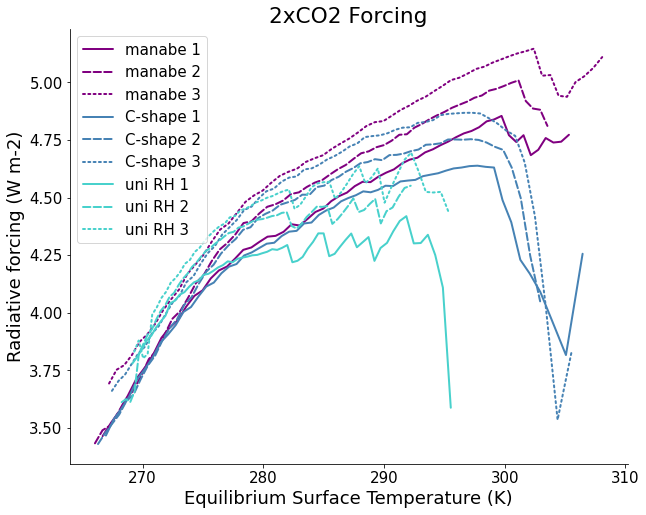

In [36]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.plot(Ts_mb_1_348,Fco2_mb_1,
        color = 'purple', label = 'manabe 1')

ax.plot(Ts_mb_2_348,Fco2_mb_2,
        color = 'purple', label = 'manabe 2', linestyle = 'dashed')

ax.plot(Ts_mb_3_348,Fco2_mb_3,
        color = 'purple', label = 'manabe 3', linestyle = 'dotted')

ax.plot(Ts_cs_1_348,Fco2_cs_1,
        color = 'steelblue', label = 'C-shape 1')

ax.plot(Ts_cs_2_348,Fco2_cs_2,
        color = 'steelblue', label = 'C-shape 2', linestyle = 'dashed')

ax.plot(Ts_cs_3_348,Fco2_cs_3,
        color = 'steelblue', label = 'C-shape 3', linestyle = 'dotted')

ax.plot(Ts_rh_1_348,Fco2_rh_1,
        color = 'mediumturquoise', label = 'uni RH 1')

ax.plot(Ts_rh_2_348,Fco2_rh_2,
        color = 'mediumturquoise', label = 'uni RH 2', linestyle = 'dashed')

ax.plot(Ts_rh_3_348,Fco2_rh_3,
        color = 'mediumturquoise', label = 'uni RH 3', linestyle = 'dotted')


ax.set_ylabel('Radiative forcing (W m-2)')
ax.set_xlabel('Equilibrium Surface Temperature (K)')
ax.set_title('2xCO2 Forcing')
plt.legend()
plt.show()

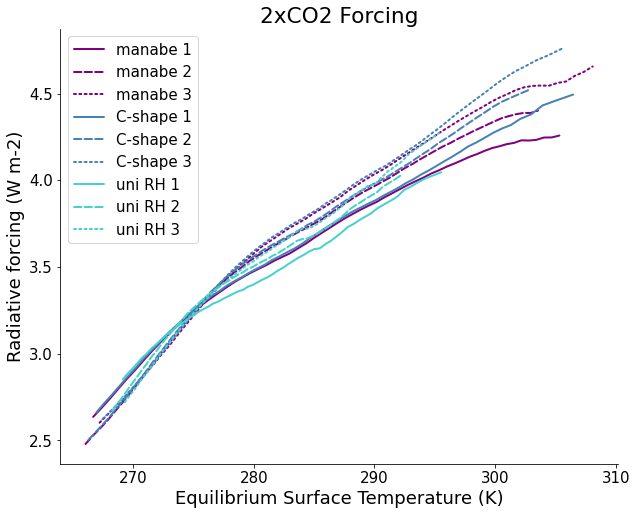

In [37]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.plot(Ts_mb_1_348,Mtoa_mb_1,
        color = 'purple', label = 'manabe 1')

ax.plot(Ts_mb_2_348,Mtoa_mb_2,
        color = 'purple', label = 'manabe 2', linestyle = 'dashed')

ax.plot(Ts_mb_3_348,Mtoa_mb_3,
        color = 'purple', label = 'manabe 3', linestyle = 'dotted')

ax.plot(Ts_cs_1_348,Mtoa_cs_1,
        color = 'steelblue', label = 'C-shape 1')

ax.plot(Ts_cs_2_348,Mtoa_cs_2,
        color = 'steelblue', label = 'C-shape 2', linestyle = 'dashed')

ax.plot(Ts_cs_3_348,Mtoa_cs_3,
        color = 'steelblue', label = 'C-shape 3', linestyle = 'dotted')

ax.plot(Ts_rh_1_348,Mtoa_rh_1,
        color = 'mediumturquoise', label = 'uni RH 1')

ax.plot(Ts_rh_2_348,Mtoa_rh_2,
        color = 'mediumturquoise', label = 'uni RH 2', linestyle = 'dashed')

ax.plot(Ts_rh_3_348,Mtoa_rh_3,
        color = 'mediumturquoise', label = 'uni RH 3', linestyle = 'dotted')


ax.set_ylabel('Radiative forcing (W m-2)')
ax.set_xlabel('Equilibrium Surface Temperature (K)')
ax.set_title('2xCO2 Forcing')
plt.legend()
plt.show()

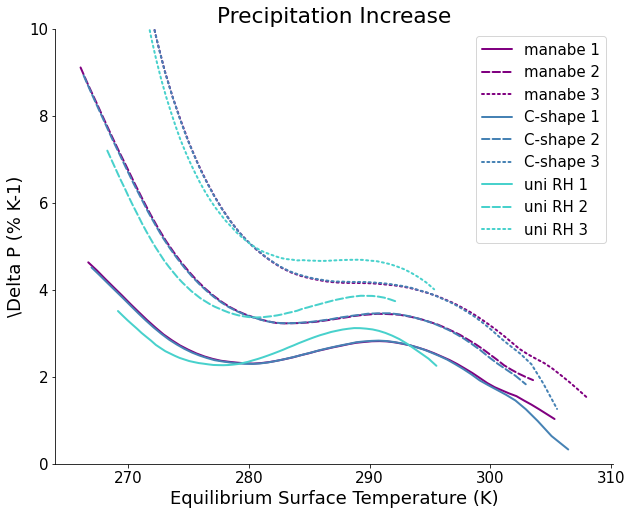

In [45]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.plot(Ts_mb_1_348,dP_mb_1,
        color = 'purple', label = 'manabe 1')

ax.plot(Ts_mb_2_348,dP_mb_2,
        color = 'purple', label = 'manabe 2', linestyle = 'dashed')

ax.plot(Ts_mb_3_348,dP_mb_3,
        color = 'purple', label = 'manabe 3', linestyle = 'dotted')

ax.plot(Ts_cs_1_348,dP_cs_1,
        color = 'steelblue', label = 'C-shape 1')

ax.plot(Ts_cs_2_348,dP_cs_2,
        color = 'steelblue', label = 'C-shape 2', linestyle = 'dashed')

ax.plot(Ts_cs_3_348,dP_cs_3,
        color = 'steelblue', label = 'C-shape 3', linestyle = 'dotted')

ax.plot(Ts_rh_1_348,dP_rh_1,
        color = 'mediumturquoise', label = 'uni RH 1')

ax.plot(Ts_rh_2_348,dP_rh_2,
        color = 'mediumturquoise', label = 'uni RH 2', linestyle = 'dashed')

ax.plot(Ts_rh_3_348,dP_rh_3,
        color = 'mediumturquoise', label = 'uni RH 3', linestyle = 'dotted')


ax.set_ylim(0,10)
ax.set_ylabel('\Delta P (% K-1)')
ax.set_xlabel('Equilibrium Surface Temperature (K)')
ax.set_title('Precipitation Increase')
plt.legend()
plt.show()

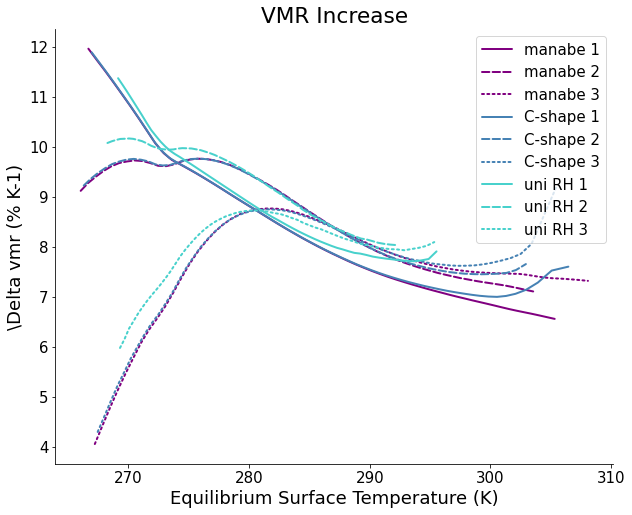

In [39]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.plot(Ts_mb_1_348,dq_mb_1,
        color = 'purple', label = 'manabe 1')

ax.plot(Ts_mb_2_348,dq_mb_2,
        color = 'purple', label = 'manabe 2', linestyle = 'dashed')

ax.plot(Ts_mb_3_348,dq_mb_3,
        color = 'purple', label = 'manabe 3', linestyle = 'dotted')

ax.plot(Ts_cs_1_348,dq_cs_1,
        color = 'steelblue', label = 'C-shape 1')

ax.plot(Ts_cs_2_348,dq_cs_2,
        color = 'steelblue', label = 'C-shape 2', linestyle = 'dashed')

ax.plot(Ts_cs_3_348,dq_cs_3,
        color = 'steelblue', label = 'C-shape 3', linestyle = 'dotted')

ax.plot(Ts_rh_1_348,dq_rh_1,
        color = 'mediumturquoise', label = 'uni RH 1')

ax.plot(Ts_rh_2_348,dq_rh_2,
        color = 'mediumturquoise', label = 'uni RH 2', linestyle = 'dashed')

ax.plot(Ts_rh_3_348,dq_rh_3,
        color = 'mediumturquoise', label = 'uni RH 3', linestyle = 'dotted')


ax.set_ylabel('\Delta vmr (% K-1)')
ax.set_xlabel('Equilibrium Surface Temperature (K)')
ax.set_title('VMR Increase')
plt.legend()
plt.show()

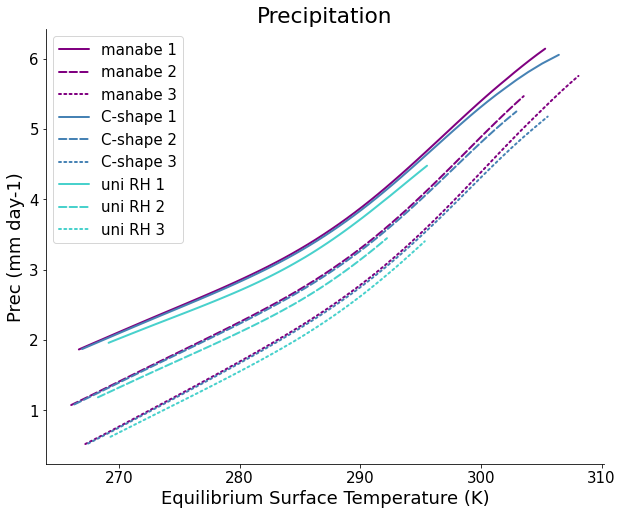

In [40]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.plot(Ts_mb_1_348,Prec_mb_1_348,
        color = 'purple', label = 'manabe 1')

ax.plot(Ts_mb_2_348,Prec_mb_2_348,
        color = 'purple', label = 'manabe 2', linestyle = 'dashed')

ax.plot(Ts_mb_3_348,Prec_mb_3_348,
        color = 'purple', label = 'manabe 3', linestyle = 'dotted')

ax.plot(Ts_cs_1_348,Prec_cs_1_348,
        color = 'steelblue', label = 'C-shape 1')

ax.plot(Ts_cs_2_348,Prec_cs_2_348,
        color = 'steelblue', label = 'C-shape 2', linestyle = 'dashed')

ax.plot(Ts_cs_3_348,Prec_cs_3_348,
        color = 'steelblue', label = 'C-shape 3', linestyle = 'dotted')

ax.plot(Ts_rh_1_348,Prec_rh_1_348,
        color = 'mediumturquoise', label = 'uni RH 1')

ax.plot(Ts_rh_2_348,Prec_rh_2_348,
        color = 'mediumturquoise', label = 'uni RH 2', linestyle = 'dashed')

ax.plot(Ts_rh_3_348,Prec_rh_3_348,
        color = 'mediumturquoise', label = 'uni RH 3', linestyle = 'dotted')


ax.set_ylabel('Prec (mm day-1)')
ax.set_xlabel('Equilibrium Surface Temperature (K)')
ax.set_title('Precipitation')
plt.legend()
plt.show()

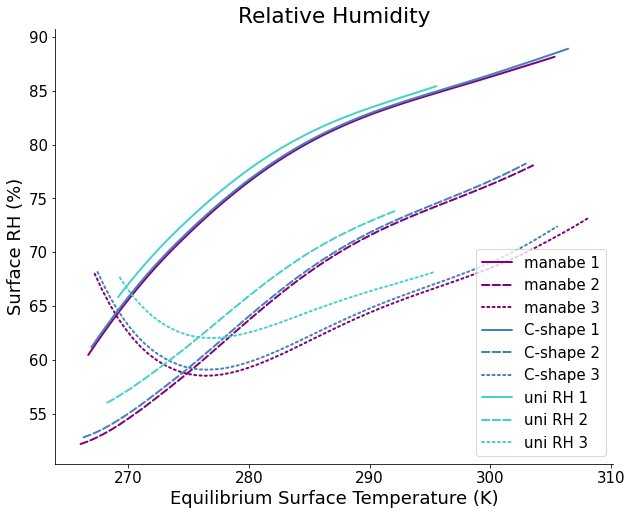

In [41]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.plot(Ts_mb_1_348,RH_mb_1_348*100,
        color = 'purple', label = 'manabe 1')

ax.plot(Ts_mb_2_348,RH_mb_2_348*100,
        color = 'purple', label = 'manabe 2', linestyle = 'dashed')

ax.plot(Ts_mb_3_348,RH_mb_3_348*100,
        color = 'purple', label = 'manabe 3', linestyle = 'dotted')

ax.plot(Ts_cs_1_348,RH_cs_1_348*100,
        color = 'steelblue', label = 'C-shape 1')

ax.plot(Ts_cs_2_348,RH_cs_2_348*100,
        color = 'steelblue', label = 'C-shape 2', linestyle = 'dashed')

ax.plot(Ts_cs_3_348,RH_cs_3_348*100,
        color = 'steelblue', label = 'C-shape 3', linestyle = 'dotted')

ax.plot(Ts_rh_1_348,RH_rh_1_348*100,
        color = 'mediumturquoise', label = 'uni RH 1')

ax.plot(Ts_rh_2_348,RH_rh_2_348*100,
        color = 'mediumturquoise', label = 'uni RH 2', linestyle = 'dashed')

ax.plot(Ts_rh_3_348,RH_rh_3_348*100,
        color = 'mediumturquoise', label = 'uni RH 3', linestyle = 'dotted')

ax.set_ylabel('Surface RH (%)')
ax.set_xlabel('Equilibrium Surface Temperature (K)')
ax.set_title('Relative Humidity')
plt.legend()
plt.show()

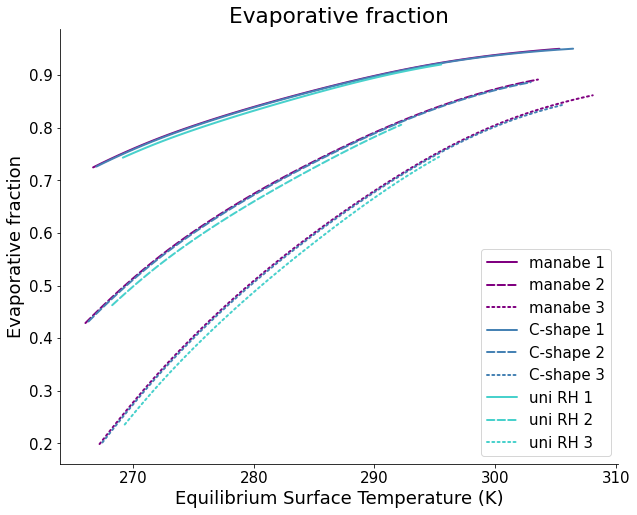

In [42]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.plot(Ts_mb_1_348,Efrac_mb_1_348,
        color = 'purple', label = 'manabe 1')

ax.plot(Ts_mb_2_348,Efrac_mb_2_348,
        color = 'purple', label = 'manabe 2', linestyle = 'dashed')

ax.plot(Ts_mb_3_348,Efrac_mb_3_348,
        color = 'purple', label = 'manabe 3', linestyle = 'dotted')

ax.plot(Ts_cs_1_348,Efrac_cs_1_348,
        color = 'steelblue', label = 'C-shape 1')

ax.plot(Ts_cs_2_348,Efrac_cs_2_348,
        color = 'steelblue', label = 'C-shape 2', linestyle = 'dashed')

ax.plot(Ts_cs_3_348,Efrac_cs_3_348,
        color = 'steelblue', label = 'C-shape 3', linestyle = 'dotted')

ax.plot(Ts_rh_1_348,Efrac_rh_1_348,
        color = 'mediumturquoise', label = 'uni RH 1')

ax.plot(Ts_rh_2_348,Efrac_rh_2_348,
        color = 'mediumturquoise', label = 'uni RH 2', linestyle = 'dashed')

ax.plot(Ts_rh_3_348,Efrac_rh_3_348,
        color = 'mediumturquoise', label = 'uni RH 3', linestyle = 'dotted')


ax.set_ylabel('Evaporative fraction')
ax.set_xlabel('Equilibrium Surface Temperature (K)')
ax.set_title('Evaporative fraction')
plt.legend()
plt.show()

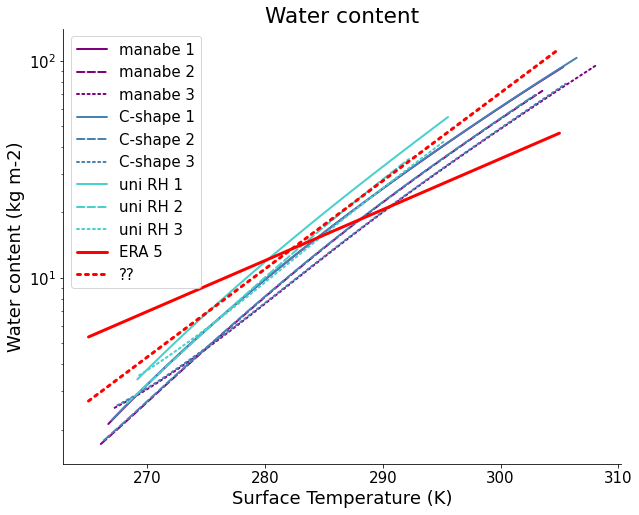

In [43]:
fig, ax = plt.subplots(figsize=(10,8))

ax.plot(Ts_mb_1_348,wvc_mb_1_348,
        color = 'purple', label = 'manabe 1')

ax.plot(Ts_mb_2_348,wvc_mb_2_348,
        color = 'purple', label = 'manabe 2', linestyle = 'dashed')

ax.plot(Ts_mb_3_348,wvc_mb_3_348,
        color = 'purple', label = 'manabe 3', linestyle = 'dotted')

ax.plot(Ts_cs_1_348,wvc_cs_1_348,
        color = 'steelblue', label = 'C-shape 1')

ax.plot(Ts_cs_2_348,wvc_cs_2_348,
        color = 'steelblue', label = 'C-shape 2', linestyle = 'dashed')

ax.plot(Ts_cs_3_348,wvc_cs_3_348,
        color = 'steelblue', label = 'C-shape 3', linestyle = 'dotted')

ax.plot(Ts_rh_1_348,wvc_rh_1_348,
        color = 'mediumturquoise', label = 'uni RH 1')

ax.plot(Ts_rh_2_348,wvc_rh_2_348,
        color = 'mediumturquoise', label = 'uni RH 2', linestyle = 'dashed')

ax.plot(Ts_rh_3_348,wvc_rh_3_348,
        color = 'mediumturquoise', label = 'uni RH 3', linestyle = 'dotted')


Ts = np.linspace(265,305,100)

ax.plot(Ts,8.3*np.exp((Ts-273.16)/18.5),
        color = 'red', label = 'ERA 5', linewidth = 3.)
ax.plot(Ts,5.8*np.exp((Ts-273.16)/10.7),
        color = 'red', label = '??',  linestyle = "dotted", linewidth = 3.)

ax.set_yscale('log')


ax.set_xlabel('Surface Temperature (K)')
ax.set_ylabel('Water content (kg m-2)')
ax.set_title('Water content')
plt.legend()
plt.show()